In [18]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt
import math
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})





def soliton(r, y):
    f, df, phi, dphi = y
    ddf = - (2 * df)/r + (2 * phi * f)
    ddphi = -(2 * dphi)/r + (4 * np.pi * (f**2))
    return [df, ddf, dphi, ddphi]


def initial_conditions(r, phi0):
    f0 = 1.0 
    df0 = 0.0  
    dphi0 = 0.0 
    return [f0, df0, phi0, dphi0]


def solve_soliton(phi0_guess, r_max, N):
    r_span = (1e-6, r_max)  
    r_eval = np.linspace(*r_span, N)
    y0 = initial_conditions(r_span[0], phi0_guess)
    sol = solve_ivp(soliton, r_span, y0, t_eval=r_eval, method='RK45', rtol=1e-6, atol=1e-8)
    f_final = sol.y[0, -1]  
    phi_final = sol.y[2, -1]  
    return sol, f_final, phi_final



def shoot_phi0(r_max, N):
    def objective(phi0):
        _, f_final, _ = solve_soliton(phi0, r_max, N)
        return f_final  ##f should approach to zero at large values of r
    phi0_bracket = [a, b]  
    for phi0 in np.linspace(*phi0_bracket, 10):
        _, f_final, _ = solve_soliton(phi0, r_max, N)
        print(f"phi0: {phi0}, f_final: {f_final}")
    result = root_scalar(objective, bracket = phi0_bracket, method = 'brentq')
    return result.root

phi0: -3.0, f_final: -83270.72462530341
phi0: -2.888888888888889, f_final: -29287.533280889667
phi0: -2.7777777777777777, f_final: -355841.8885662148
phi0: -2.6666666666666665, f_final: -545535.2903214613
phi0: -2.5555555555555554, f_final: -27115.117893483766
phi0: -2.4444444444444446, f_final: -20278.28041655227
phi0: -2.3333333333333335, f_final: -34007.777694937446
phi0: -2.2222222222222223, f_final: 178758.64893084188
phi0: -2.111111111111111, f_final: 16349.209455763053
phi0: -2.0, f_final: 5221230.554753676
phi0_initial = -2.302538153615188


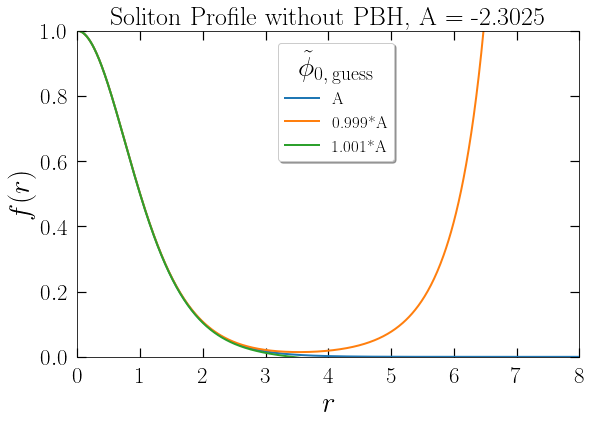

In [19]:
fig,ax = plt.subplots(1, figsize = (9, 6))
plt.rc('lines', linewidth = 2)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')



r_max = 10  
N = 1000  

a = -3
b = -2


phi0_initial = shoot_phi0(r_max, N)
solution, _, _ = solve_soliton(phi0_initial, r_max, N)
print("phi0_initial =", phi0_initial)
r_values = solution.t
f_values = solution.y[0]
phi_values = solution.y[2]


phi0_initial_1 = phi0_initial * 0.999
solution, _, _ = solve_soliton(phi0_initial_1, r_max, N)
r_values_1 = solution.t
f_values_1 = solution.y[0]
phi_values = solution.y[2]


phi0_initial_2 = phi0_initial * 1.001
solution, _, _ = solve_soliton(phi0_initial_2, r_max, N)
r_values_2 = solution.t
f_values_2 = solution.y[0]
phi_values = solution.y[2]





ax.plot(r_values, f_values)
ax.plot(r_values_1, f_values_1)
ax.plot(r_values_2, f_values_2)
plt.xlim(0, 8)
plt.ylim(0, 1)
ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel("$r$", fontsize = 29)
plt.ylabel("$f(r)$", fontsize = 29)
plt.legend(["A", "0.999*A", "1.001*A"], 
           prop = {'size':17}, loc = (0.4, 0.6), shadow = True, 
           title = r'$\tilde{\phi}_{0,\,\mathrm{guess}}$' ,
           title_fontsize = 28, facecolor = 'white', fontsize = 20)
plt.title("Soliton Profile without PBH, A = -2.3025", fontsize = 26)
plt.savefig('soliton_linearplot.pdf',bbox_inches = 'tight')
plt.show()


phi0: -3.0, f_final: -83270.72462530341
phi0: -2.888888888888889, f_final: -29287.533280889667
phi0: -2.7777777777777777, f_final: -355841.8885662148
phi0: -2.6666666666666665, f_final: -545535.2903214613
phi0: -2.5555555555555554, f_final: -27115.117893483766
phi0: -2.4444444444444446, f_final: -20278.28041655227
phi0: -2.3333333333333335, f_final: -34007.777694937446
phi0: -2.2222222222222223, f_final: 178758.64893084188
phi0: -2.111111111111111, f_final: 16349.209455763053
phi0: -2.0, f_final: 5221230.554753676
phi0_initial = -2.302538153615188


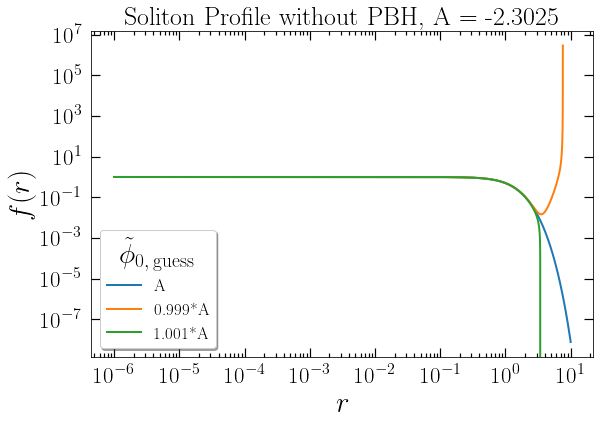

In [21]:
fig,ax = plt.subplots(1, figsize = (9, 6))
plt.rc('lines', linewidth = 2)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')



r_max = 10  
N = 1000  


a = -3
b = -2


phi0_initial = shoot_phi0(r_max, N)
solution, _, _ = solve_soliton(phi0_initial, r_max, N)
print("phi0_initial =", phi0_initial)
r_values = solution.t
f_values = solution.y[0]
phi_values = solution.y[2]


phi0_initial_1 = phi0_initial * 0.999
solution, _, _ = solve_soliton(phi0_initial_1, r_max, N)
r_values_1 = solution.t
f_values_1 = solution.y[0]
phi_values = solution.y[2]


phi0_initial_2 = phi0_initial * 1.001
solution, _, _ = solve_soliton(phi0_initial_2, r_max, N)
r_values_2 = solution.t
f_values_2 = solution.y[0]
phi_values = solution.y[2]





ax.loglog(r_values, f_values)
ax.loglog(r_values_1, f_values_1)
ax.loglog(r_values_2, f_values_2)
ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel("$r$", fontsize = 29)
plt.ylabel("$f(r)$", fontsize = 29)
plt.legend(["A", "0.999*A", "1.001*A"], 
           prop = {'size':17}, loc = 'lower left', shadow = True, 
           title = r'$\tilde{\phi}_{0,\,\mathrm{guess}}$' ,
           title_fontsize = 28, facecolor = 'white', fontsize = 20)
plt.title("Soliton Profile without PBH, A = -2.3025", fontsize = 26)
plt.savefig('soliton_logplot.pdf',bbox_inches = 'tight')
plt.show()
